# Etude de features pour la séparation ds différentes catégories de type "Book"

Dans les premières classifications effectuées, nous avons eu des difficulté à séparer certaines catégories, notamment les suivantes:
| PrdTypeCode | Catégorie |
|-------|-------|
|10| Livres occasion|
|2280| Magazines occasion|
|2403| Livres BD magazines|
|2705| Livres neufs|

Ainsi, nous allos dans ce notebook chercher à identifier, à partir de designation et description, des features qui permettent de séparer ces classes, et tester une séparation de ces features pour ces catégories à partir d'algorithmes communs.

In [1]:
import numpy as np
import pandas as pd
import os
import re
import seaborn as sns
import matplotlib.pyplot as plt
# Récupérer le fichier parent en tant que BASE_DIR
BASE_DIR = "C:/Users/mangg/projects/rakutenteam"
os.chdir(BASE_DIR)

In [2]:
df = pd.read_csv("data/clean/X_train.csv", index_col=0)
df.head()

,designation,description,productid,imageid,language,designation_translated,description_translated
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3804725264,1263597046,de,Olivia : Carnet personnalisé / 150 pages / gri...,NaN
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,436067568,1008141237,fr,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978,fr,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,50418756,457047496,en,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN
4,La Guerre Des Tuques,Luc a des idées de grandeur. Il veut organiser...,278535884,1077757786,fr,La Guerre Des Tuques,Luc a des idées de grandeur. Il veut organiser...


In [3]:
target = pd.read_csv("data/clean/Y_train.csv", index_col=0)
target.head()

,prdtypecode
0,10
1,2280
2,50
3,1280
4,2705


In [4]:
df.designation

0        Olivia: Personalisiertes Notizbuch / 150 Seite...
1        Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...
2        Grand Stylet Ergonomique Bleu Gamepad Nintendo...
3        Peluche Donald - Europe - Disneyland 2000 (Mar...
4                                     La Guerre Des Tuques
                               ...                        
84911                          The Sims [ Import Anglais ]
84912    Kit piscine acier NEVADA déco pierre Ø 3.50m x...
84913    Journal Officiel De La Republique Francaise N°...
84914    Table Basse Bois De Récupération Massif Base B...
84915    Gomme De Collection 2 Gommes Pinguin Glace Ver...
Name: designation, Length: 84916, dtype: object

In [7]:
from src.features.text.transformers.extractors import YearExtractor

In [8]:
year_extractor = YearExtractor(text_column="designation")
years = year_extractor.fit_transform(df)
years.head()


   year
0     0
1  2001
2     0
3  2000
4     0
   year  has_year
0     0     False
1  2001      True
2     0     False
3  2000      True
4     0     False


,year,has_year
0,0,False
1,2001,True
2,0,False
3,2000,True
4,0,False


In [ ]:
book_codes = [10, 2280, 2403, 2705]
book_filter = target.prdtypecode.isin(book_codes)

In [ ]:
df.loc[book_filter, "designation"].head(100)

0      Olivia: Personalisiertes Notizbuch / 150 Seite...
1      Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...
4                                   La Guerre Des Tuques
5      Afrique Contemporaine N° 212 Hiver 2004 - Doss...
6             Christof E: Bildungsprozessen Auf Der Spur
                             ...                        
511    L  Indochine Hors-Série N° 0000 : Economique E...
512                Revue Nous Deux 45 Numéros Année 1957
513                 Sherwood G: Pedigree Register Vol. 2
514             Cintia Occupation Double A Changé Ma Vie
515                        Lettre Sur Le Pouvoir décrire
Name: designation, Length: 100, dtype: object

In [ ]:
book_info = years.to_frame().join(target).loc[book_filter]
book_info["has_year"] = book_info.year.notnull()
book_info["book_type"] = book_info.prdtypecode.map({10: "Livres occasion", 2280: "Magazines occasion", 2403: "Livres BD magazines", 2705: "Livres neufs"})

In [ ]:
book_info .info()

<class 'pandas.core.frame.DataFrame'>
Index: 15411 entries, 0 to 84913
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         4622 non-null   float64
 1   prdtypecode  15411 non-null  int64  
 2   has_year     15411 non-null  bool   
 3   book_type    15411 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 496.6+ KB


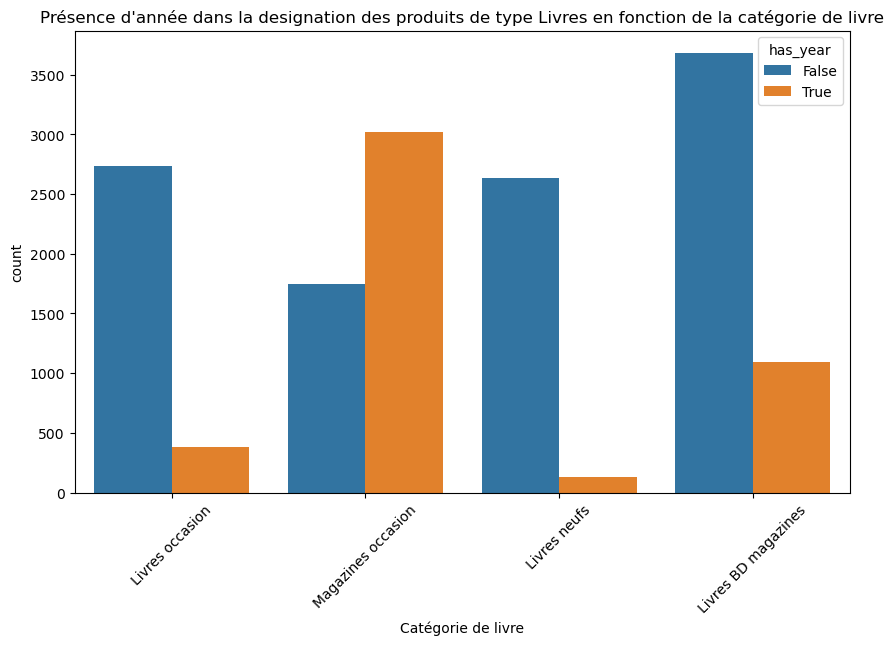

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=book_info, x="book_type", hue="has_year")
plt.xticks(rotation=45)
plt.title("Présence d'année dans la designation des produits de type Livres en fonction de la catégorie de livre")
plt.xlabel("Catégorie de livre")
plt.show()

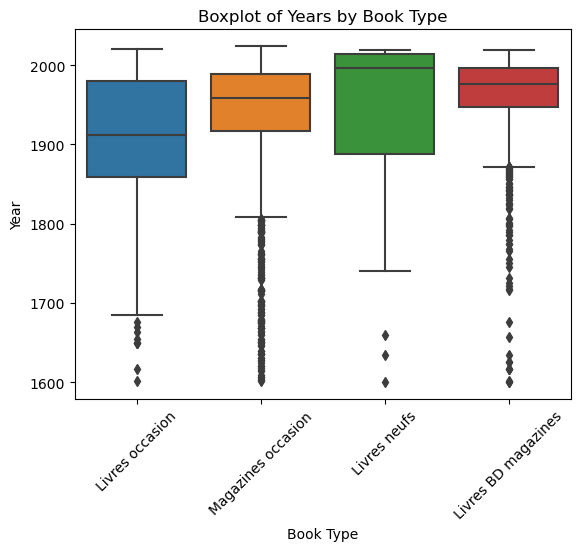

In [ ]:
import seaborn as sns
# Group the data by book type and extract the years

# Plot the boxplot using seaborn
sns.boxplot(data=book_info, x="book_type", y="year")
plt.xticks(rotation=45)
plt.xlabel("Book Type")
plt.ylabel("Year")
plt.xticks(rotation=45, )
plt.title("Boxplot of Years by Book Type")
plt.show()


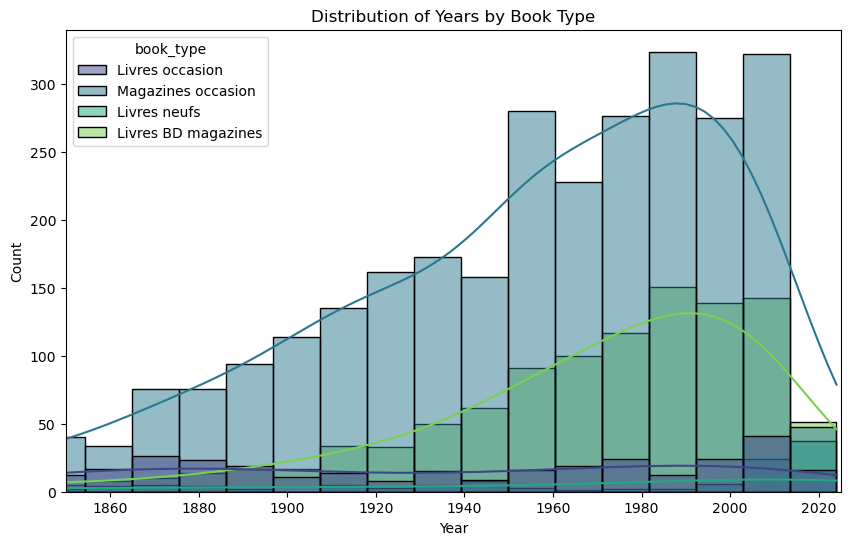

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=book_info, x="year", hue="book_type", kde=True, bins=40, palette="viridis")
plt.title("Distribution of Years by Book Type")
plt.xlabel("Year")
plt.xlim(1850, 2025)
plt.show()

In [ ]:
from src.features.text.transformers.text_merger import TextMerger

merger = TextMerger(designation_column="designation", description_column="description", merged_column="full_description")
merged_text = merger.fit_transform(df)
df["full_description"] = merged_text


In [ ]:
full_description_years = df.full_description.str.extract(pattern, expand=False).rename("year").astype(float)

In [ ]:
full_book_info = full_description_years.to_frame().join(target).loc[book_filter]
full_book_info["has_year"] = full_book_info.year.notnull()
full_book_info["book_type"] = full_book_info.prdtypecode.map({10: "Livres occasion", 2280: "Magazines occasion", 2403: "Livres BD magazines", 2705: "Livres neufs"})

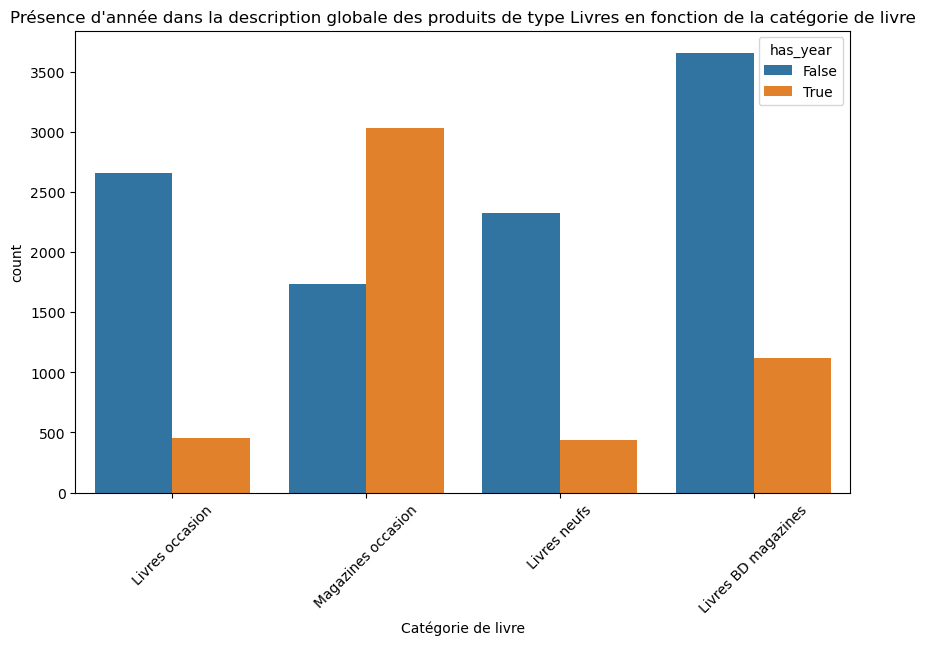

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=full_book_info, x="book_type", hue="has_year")
plt.xticks(rotation=45)
plt.title("Présence d'année dans la description globale des produits de type Livres en fonction de la catégorie de livre")
plt.xlabel("Catégorie de livre")
plt.show()

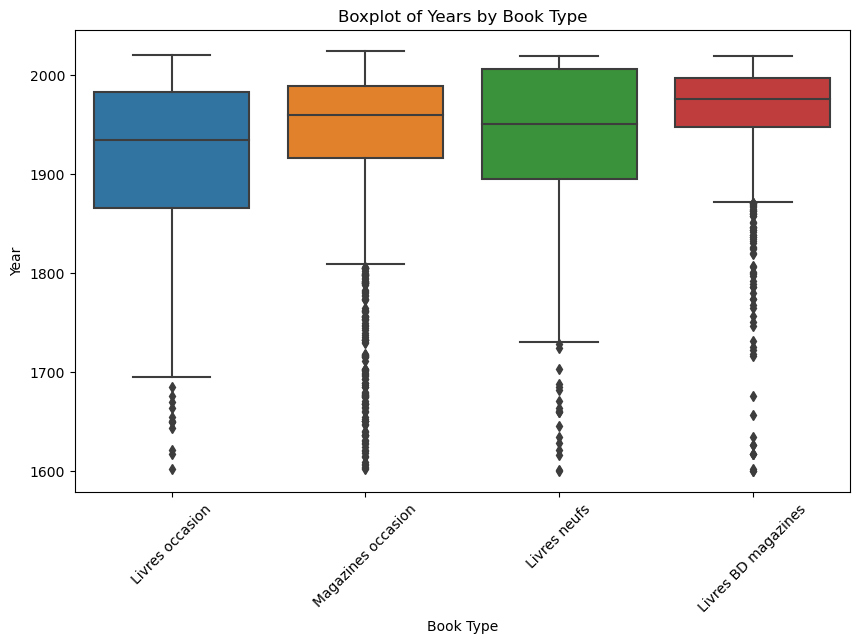

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=full_book_info, x="book_type", y="year")
plt.xticks(rotation=45)
plt.xlabel("Book Type")
plt.ylabel("Year")
plt.xticks(rotation=45, )
plt.title("Boxplot of Years by Book Type")
plt.show()

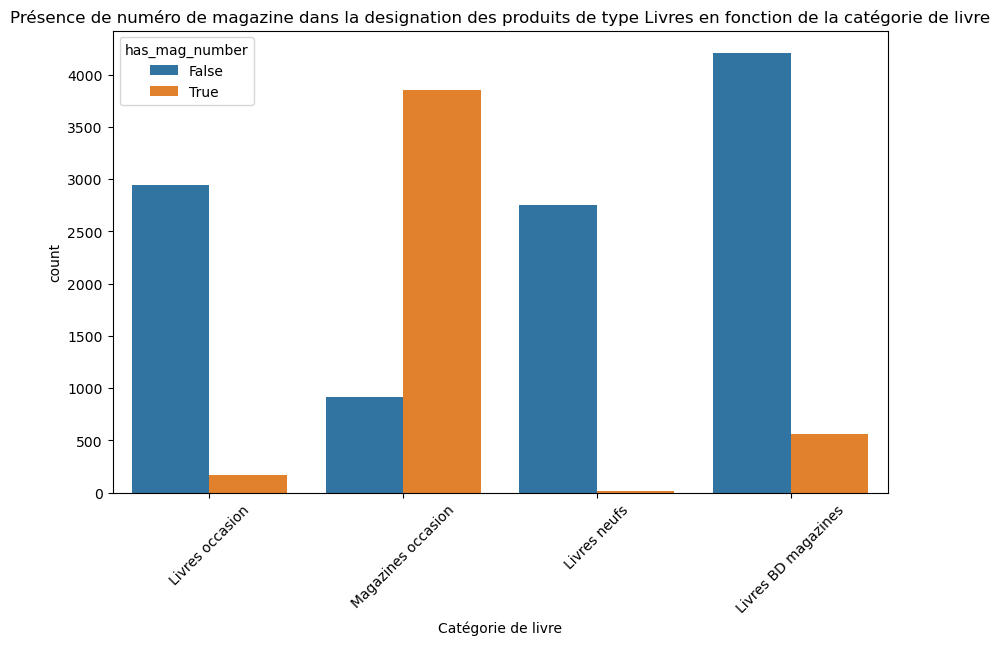

In [ ]:
mag_number_pattern = r"([Nn]\s?°\s?\d+)"

mag_numbers = df.designation.str.extract(mag_number_pattern, expand=False).rename("mag_number")

mag_number_info = mag_numbers.to_frame().join(target).loc[book_filter]
mag_number_info["has_mag_number"] = mag_number_info.mag_number.notnull()
mag_number_info["book_type"] = mag_number_info.prdtypecode.map({10: "Livres occasion", 2280: "Magazines occasion", 2403: "Livres BD magazines", 2705: "Livres neufs"})

plt.figure(figsize=(10, 6))
sns.countplot(data=mag_number_info, x="book_type", hue="has_mag_number")
plt.xticks(rotation=45)
plt.title("Présence de numéro de magazine dans la designation des produits de type Livres en fonction de la catégorie de livre")
plt.xlabel("Catégorie de livre")
plt.show()


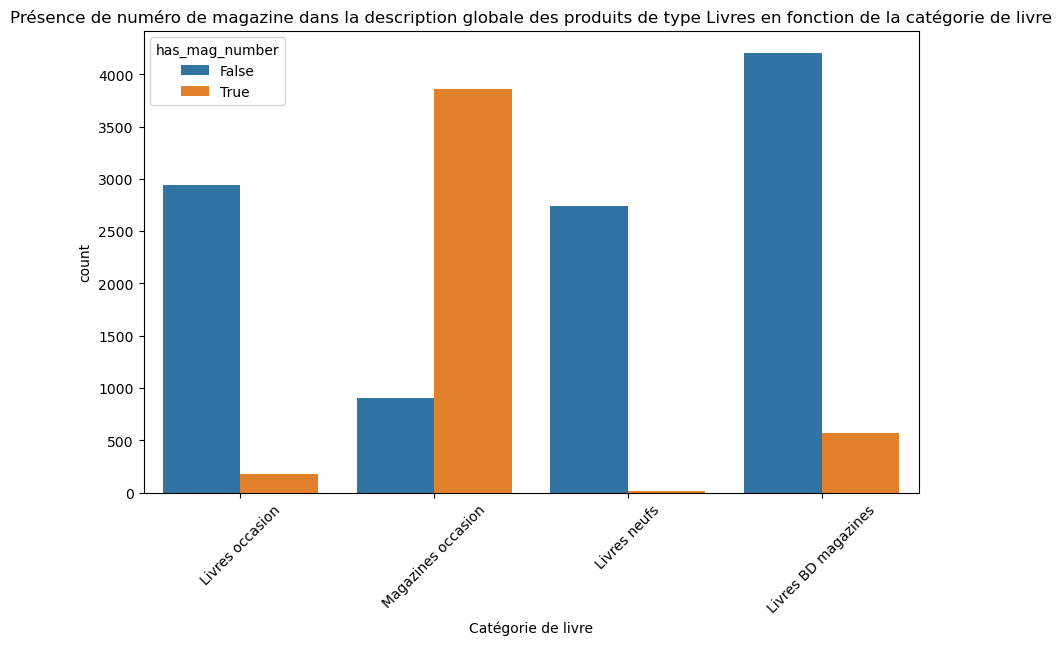

In [ ]:
full_mag_numbers = df.full_description.str.extract(mag_number_pattern, expand=False).rename("mag_number")

full_mag_number_info = full_mag_numbers.to_frame().join(target).loc[book_filter]
full_mag_number_info["has_mag_number"] = full_mag_number_info.mag_number.notnull()
full_mag_number_info["book_type"] = full_mag_number_info.prdtypecode.map({10: "Livres occasion", 2280: "Magazines occasion", 2403: "Livres BD magazines", 2705: "Livres neufs"})

plt.figure(figsize=(10, 6))
sns.countplot(data=full_mag_number_info, x="book_type", hue="has_mag_number")
plt.xticks(rotation=45)
plt.title("Présence de numéro de magazine dans la description globale des produits de type Livres en fonction de la catégorie de livre")
plt.xlabel("Catégorie de livre")
plt.show()

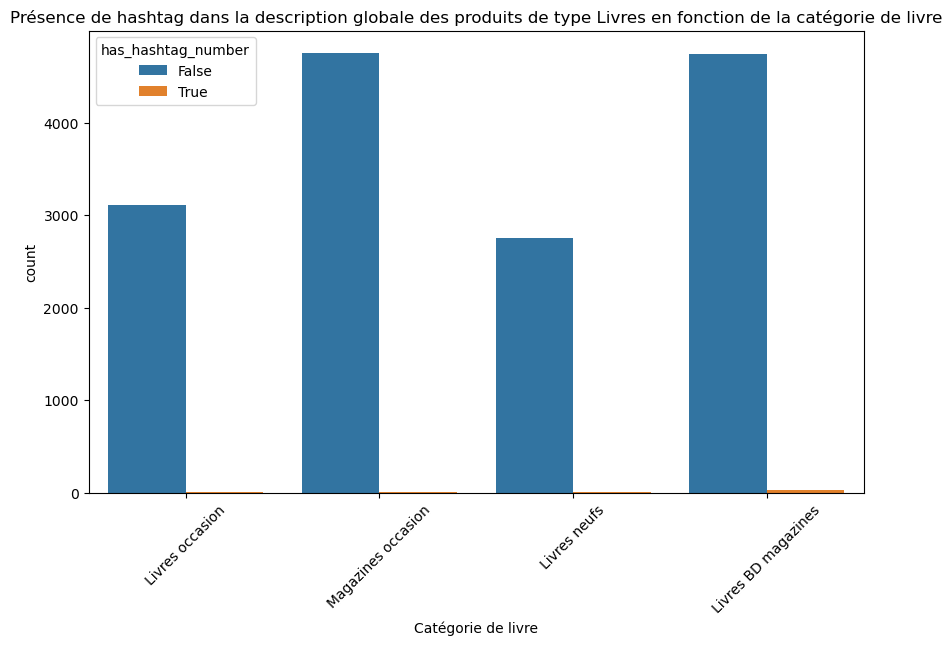

In [ ]:
hashtag_number_pattern = r"(#[\d\s\-]+)"
hashtags = df.full_description.str.extract(hashtag_number_pattern, expand=False).rename("hashtag_number")

hashtag_info = hashtags.to_frame().join(target).loc[book_filter]
hashtag_info["has_hashtag_number"] = hashtag_info.hashtag_number.notnull()
hashtag_info["book_type"] = hashtag_info.prdtypecode.map({10: "Livres occasion", 2280: "Magazines occasion", 2403: "Livres BD magazines", 2705: "Livres neufs"})

plt.figure(figsize=(10, 6))
sns.countplot(data=hashtag_info, x="book_type", hue="has_hashtag_number")
plt.xticks(rotation=45)
plt.title("Présence de hashtag dans la description globale des produits de type Livres en fonction de la catégorie de livre")
plt.xlabel("Catégorie de livre")
plt.show()

In [ ]:
df.full_description.loc[book_filter].to_list()

['Olivia: Personalisiertes Notizbuch / 150 Seiten / Punktraster / Ca Din A5 / Rosen-Design ',
 "Journal Des Arts (Le) N° 133 Du 28/09/2001 - L'art Et Son Marche Salon D'art Asiatique A Paris - Jacques Barrere - Francois Perrier - La Reforme Des Ventes Aux Encheres Publiques - Le Sna Fete Ses Cent Ans. ",
 "La Guerre Des Tuques Luc a des idées de grandeur. Il veut organiser un jeu de guerre de boules de neige et s'arranger pour en être le vainqueur incontesté. Mais Sophie s'en mêle et chambarde tous ses plans...",
 'Afrique Contemporaine N° 212 Hiver 2004 - Dossier Japon / Afrique ',
 'Christof E: Bildungsprozessen Auf Der Spur ',
 'Walter Scott Oeuvres Complètes Tomes 3456 10 Et 11 ',
 "Monde Illustre (Le) N° 3083 Du 20/01/1917 - L'emprunt De La Victoire En Angleterre - Le Meeting Du Guildhall - Lloyd George - Bonar Law Et Mac Kenna - La Conference Des Allies - Briand - Barrere - Le General Palitzine ",
 "Univers (L') N° 249 Du 12/09/1854 - France - Paris 11 Septembre 1854 Par Du Lac -

In [ ]:
complete_book_info = full_book_info.join(full_mag_number_info.has_mag_number).join(hashtag_info.has_hashtag_number)
complete_book_info

,year,prdtypecode,has_year,book_type,has_mag_number,has_hashtag_number
0,NaN,10,False,Livres occasion,False,False
1,2001.0,2280,True,Magazines occasion,True,False
4,NaN,2705,False,Livres neufs,False,False
5,2004.0,2280,True,Magazines occasion,True,False
6,NaN,10,False,Livres occasion,False,False
...,...,...,...,...,...,...
84878,NaN,2280,False,Magazines occasion,True,False
84896,NaN,10,False,Livres occasion,False,False
84898,1898.0,2280,True,Magazines occasion,True,False
84900,NaN,10,False,Livres occasion,False,False


# Etude de corrélations

In [ ]:
import statsmodels.formula as smf
import statsmodels.api as sm
import scipy.stats as stats

## Etude de la corrélation entre la présence d'année et le type de livre

In [ ]:
contingency = pd.crosstab(complete_book_info.has_year, complete_book_info.book_type, colnames=["Type de livre"], rownames=["Présence d'année"])
contingency

Type de livre,Livres BD magazines,Livres neufs,Livres occasion,Magazines occasion
Présence d'année,,,,
False,3659,2326,2661,1732
True,1115,435,455,3028


In [ ]:
res = stats.chi2_contingency(contingency)
print(f"On obtient le résultat {res.statistic:.2f}, avec la p-value {res.pvalue:.4f}")

On obtient le résultat 3082.40, avec la p-value 0.0000


## Etude de la corrélation entre l'année détectée et le type de livre

In [ ]:
res = smf.api.ols("year ~ book_type", data=complete_book_info).fit()
table = sm.stats.anova_lm(res)
table

,df,sum_sq,mean_sq,F,PR(>F)
book_type,3.0,7.998524e+05,266617.478869,54.406043,1.332667e-34
Residual,5029.0,2.464468e+07,4900.512255,NaN,NaN


Noous pouvons ici valider l'hypothèse d'une corrélation entre l'année détectée et le type de livre avec une p-value très inférieure à 5%

## Etude de la corrélation entre la présence de numéro de magazine et le type de livre

In [ ]:
contingency = pd.crosstab(complete_book_info.has_mag_number, complete_book_info.book_type, colnames=["Type de livre"], rownames=["Présence de N°"])
contingency

Type de livre,Livres BD magazines,Livres neufs,Livres occasion,Magazines occasion
Présence de N°,,,,
False,4208,2745,2939,905
True,566,16,177,3855


In [ ]:
res = stats.chi2_contingency(contingency)
print(f"On obtient le résultat {res.statistic:.2f}, avec la p-value {res.pvalue:.4f}")

On obtient le résultat 8666.64, avec la p-value 0.0000


## Etude de la corrélation entre  présence de hashtag dans la description des produits et le type livre

In [ ]:
contingency = pd.crosstab(complete_book_info.has_hashtag_number, complete_book_info.book_type, colnames=["Type de livre"], rownames=["Présence de N°"])
contingency

Type de livre,Livres BD magazines,Livres neufs,Livres occasion,Magazines occasion
Présence de N°,,,,
False,4744,2755,3112,4757
True,30,6,4,3


In [ ]:
res = stats.chi2_contingency(contingency)
print(f"On obtient le résultat {res.statistic:.2f}, avec la p-value {res.pvalue:.4f}")

On obtient le résultat 31.84, avec la p-value 0.0000


Les features créées semblent toutes cohérentes pour identifier les catégories, ce que nous allons tenter de faire par la suite.

## Préparation des données pour le modèle

### Séparation de data et target

In [ ]:
y = complete_book_info.prdtypecode
data = complete_book_info.drop(columns=["prdtypecode", "book_type"]).fillna(0)
data = data.astype(int)
data.describe().round(2)

,year,has_year,has_mag_number,has_hashtag_number
count,15411.00,15411.00,15411.00,15411.00
mean,634.54,0.33,0.30,0.00
std,912.11,0.47,0.46,0.05
min,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00
75%,1913.00,1.00,1.00,0.00
max,2024.00,1.00,1.00,1.00


### Scaling the data with MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, columns=data.columns)
scaled_data.describe().round(2)

,year,has_year,has_mag_number,has_hashtag_number
count,15411.00,15411.00,15411.00,15411.00
mean,0.31,0.33,0.30,0.00
std,0.45,0.47,0.46,0.05
min,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00
75%,0.95,1.00,1.00,0.00
max,1.00,1.00,1.00,1.00


### Split the data into training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.2, random_state=42)

### Defining models to experiment with

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier

In [ ]:
clf_svc = SVC(random_state=42)
clf_rf = RandomForestClassifier(random_state=42)
clf_lr = LogisticRegression(random_state=42)
clf_knn = KNeighborsClassifier()
clf_dum = DummyClassifier(random_state=42)

In [ ]:
svc_params = {"C": [0.1, 1, 10, 100], "gamma": [1, 0.1, 0.01, 0.001], "kernel": ["rbf", "poly", "sigmoid"]}
rf_params = {"n_estimators": [10, 100, 1000], "max_depth": [None, 5, 10, 20, 30], "min_samples_split": [2, 5, 10], "min_samples_leaf": [1, 2, 4]}
lr_params = {"C": [0.1, 1, 10, 100], "penalty": ["l1", "l2"]}
knn_params = {"n_neighbors": [3, 5, 11, 19], "weights": ["uniform", "distance"], "metric": ["euclidean", "manhattan"]}
dum_params = {"strategy": ["stratified", "most_frequent", "prior", "uniform"]}

In [ ]:
classifiers = [
    ("Dummy", clf_dum, dum_params),
    ("SVC", clf_svc, svc_params),
    ("Random Forest", clf_rf, rf_params),
    ("Logistic Regression", clf_lr, lr_params),
    ("KNN", clf_knn, knn_params),
    
]

In [ ]:
results = pd.DataFrame(columns=["Accuracy"], index=["Dummy", "SVC", "Random Forest", "Logistic Regression", "KNN"])


In [ ]:
for name, clf, params in classifiers:
    print (f"Training {name}...")
    grid = GridSearchCV(clf, params, cv=4, n_jobs=-1, verbose=1, scoring="accuracy")
    grid.fit(X_train, y_train)
    print(f"Meilleurs paramètres pour {name}: {grid.best_params_}")
    print(f"Meilleur score pour {name}: {grid.best_score_:.3f}")
    test_score = grid.score(X_test, y_test)
    print(f"Score sur le test set pour {name}: {test_score:.3f}")
    results.loc[name, "Accuracy"] = test_score

Training Dummy...
Fitting 4 folds for each of 4 candidates, totalling 16 fits
Meilleurs paramètres pour Dummy: {'strategy': 'most_frequent'}
Meilleur score pour Dummy: 0.308
Score sur le test set pour Dummy: 0.312
Training SVC...
Fitting 4 folds for each of 48 candidates, totalling 192 fits
Meilleurs paramètres pour SVC: {'C': 10, 'gamma': 1, 'kernel': 'poly'}
Meilleur score pour SVC: 0.522
Score sur le test set pour SVC: 0.533
Training Random Forest...
Fitting 4 folds for each of 135 candidates, totalling 540 fits
Meilleurs paramètres pour Random Forest: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Meilleur score pour Random Forest: 0.525
Score sur le test set pour Random Forest: 0.539
Training Logistic Regression...
Fitting 4 folds for each of 8 candidates, totalling 32 fits


c:\Users\mangg\anaconda3\envs\Rakuten\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
16 fits failed out of a total of 32.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\mangg\anaconda3\envs\Rakuten\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\mangg\anaconda3\envs\Rakuten\lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\mangg\anaconda3\envs\Rakuten\lib\site-packages\sklearn\linear_model\_logistic.py", line 1168, in fit
    solver =

Meilleurs paramètres pour Logistic Regression: {'C': 100, 'penalty': 'l2'}
Meilleur score pour Logistic Regression: 0.523
Score sur le test set pour Logistic Regression: 0.534
Training KNN...
Fitting 4 folds for each of 16 candidates, totalling 64 fits
Meilleurs paramètres pour KNN: {'metric': 'euclidean', 'n_neighbors': 19, 'weights': 'uniform'}
Meilleur score pour KNN: 0.490
Score sur le test set pour KNN: 0.532


In [ ]:
results

,Accuracy
Dummy,0.311709
SVC,0.532598
Random Forest,0.53941
Logistic Regression,0.53422
KNN,0.531625
